---
format:
  html:
    other-links:
      - text: This notebook
        href: A7.ipynb
---

# A7: Legendre Polynomials

- Complete the following and submit to Canvas before Nov 14 11:59PM,
- Late work will recieve 0%,
- Each assignment is worth the same, 
- Please get in contact with the instructor in plenty of time if you need help,
- Before submitting your work, make sure to check everything runs as expected. Click **Kernel > Restart Kernel and Run All Cells**.
- Feel free to add more cells to experiment or test your answers,
- I encourage you to discuss the course material and assignment questions with your classmates. However, unless otherwise explicitly stated on the assignment, you must complete and write up your solutions on your own,
- The use of GenAI is prohibited as outlined in the course syllabus. If I suspect you of cheating, you may be asked to complete a written or oral exam on the content of this assignment. 

In [2]:
# | code-fold: true
using Plots
using LaTeXStrings
using Polynomials
using LinearAlgebra

::: {.callout-note}

Recall that $P_n$ is the monic (leading coefficient $= 1$) polynomials of degree $n$ for which 

\begin{align}
    \int_{-1}^{+1} P_n(x) q(x) \mathrm{d}x = 0 
\end{align}

for all polynomials $q$ of degree less than or equal to $n-1$ (that is, $q \in \mathcal P_{n-1}$). We are interested in computing (the roots of) $P_n$ in order to define Gauss quadrature rules.

:::

1. Show that $P_n$ can be equivalently defined as the monic polynomial of degree $n$ for which 

\begin{align}
    \int_{-1}^1 P_n(x) P_m(x) \mathrm{d}x = 0
    %
    \qquad \text{for all } n \not= m. 
\end{align}

<div class='alert alert-block alert-success'><b>Answer.</b> 

If $\int_{-1}^1 P_n(x) q(x) \mathrm{d}x = 0$ for all $q\in \mathcal P_{n-1}$, then $\int_{-1}^1 P_n(x) P_m(x) \mathrm{d}x = 0$ for all $m < n$. 

On the other hand, suppose that $\int_{-1}^1 P_n(x) P_m(x) \mathrm{d}x = 0$ for all $m < n$. We are trying to prove that $\int_{-1}^1 P_n(x) q(x) \mathrm{d}x = 0$ for all $q\in \mathcal P_{n-1}$. Therefore, if there exist $(a_j)$ such that $q(x) = a_{n-1} P_{n-1}(x) + \dots + a_1 P_1(x) + a_0 P_0(x)$, then we have

\begin{align}
    \int_{-1}^1 P_n(x) q(x) \mathrm{d}x
    %
    &= \int_{-1}^1 P_n(x) \left[ a_{n-1} P_{n-1}(x) + \dots + a_1 P_1(x) + a_0 P_0(x) \right] \mathrm{d}x \nonumber\\
    %
    &= \sum_{j=0}^{n-1} a_j \int_{-1}^1 P_n(x) P_j(x) \mathrm{d}x
    %
    = 0.
\end{align}

Therefore, all is left to prove is that there exist $(a_j)$ such that $q(x) = a_{n-1} P_{n-1}(x) + \dots + a_1 P_1(x) + a_0 P_0(x)$. Notice that if $n=0$, then $q(x) = a_0 = a_0 P_0(x)$ for some constant $a_0$. Now we assume (induction hypothesis) that all $r\in \mathcal P_{n-2}$ can be written as a linear combination of Legendre polynomials of degree $\leq n-2$. Therefore, for $q\in \mathcal P_{n-1}$, there exist $r, s \in \mathcal P_{n-2}$ and $a_{n-1}$ such that 

\begin{align}
    q(x) &= a_{n-1} x^{n-1} + s(x) \\
    %
    &= a_{n-1} P_{n-1}(x) + r(x)
\end{align}

(here, we have used the fact that $P_{n-1}$ is a monic polynomial). By the inductive hypothesis, we can write $r(x) = \sum_{j=0}^{n-2} a_j P_{j}(x)$ which concludes the proof.

</div> 

::: {.callout-note}

In lectures, we showed that $P_0(x) = 1$, $P_1(x) = x$, and 

\begin{align}
    P_{n+1}(x) = (x - a_n) P_{n}(x) - b_n P_{n-1}(x).
\end{align}

for all $n\geq 1$, where

\begin{align}
    a_n &:= \frac{ \int_{-1}^1 x P_{n}(x)^2 \mathrm{d}x }{\|P_{n}\|_{L^2}^2} \qquad \text{and} \qquad 
    b_{n} := \frac{ \int_{-1}^1 x P_{n}(x) P_{n-1}(x) \mathrm{d}x }{\|P_{n-1}\|_{L^2}^2}.
\end{align}

and $\| f \|_{L^2}^2 := \int_{-1}^1 f(x)^2 \mathrm{d}x$. 

::: 

2. Show that $b_n = \frac{\|P_n\|_{L^2}^2}{\|P_{n-1}\|_{L^2}^2}$.

<div class='alert alert-block alert-success'><b>Answer.</b> 

Notice that, since $P_1(x) = x P_0(x)$, we have

\begin{align}
    \int_{-1}^1 P_1(x)^2 \mathrm{d}x &= \int_{-1}^{+1} x P_1(x) P_0(x) \mathrm{d}x.
\end{align}

Moreover, for $n \geq 2$, we have $P_{n}(x) = (x-a_{n-1}) P_{n-1}(x) - b_{n-1} P_{n-2}(x)$, and so 

\begin{align}
    \int_{-1}^1 P_{n}(x)^2 \mathrm{d}x 
    %
    &= \int_{-1}^1 P_{n}(x) \left[ (x-a_{n-1}) P_{n-1}(x) - b_{n-1} P_{n-2}(x) \right] \mathrm{d}x \\
    %
    &= \int_{-1}^1 x P_{n}(x) P_{n-1}(x) \mathrm{d}x - a_{n-1} \int_{-1}^1 P_n P_{n-1} - b_{n-1} \int_{-1}^1 P_n P_{n-2} \nonumber\\
    %
    &= \int_{-1}^1 x P_{n}(x) P_{n-1}(x) \mathrm{d}x.
\end{align}

</div> 

::: {.callout-note}

This lets us construct the polynomials $\{P_n\}$ which is demonstrated in the following code:

:::

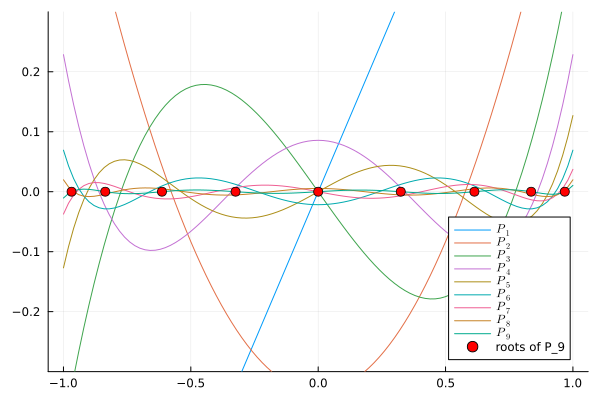

In [3]:
N = 10;
x = Polynomial([0,1])

# P[0] = 1;
P = [ Polynomial([0,1]), Polynomial([-1/3,0,1]) ]

for n ∈ 2:(N-1)
    a = integrate( x * P[n]^2, -1, 1 ) / integrate( P[n]^2, -1, 1 )
    b = integrate( P[n]^2, -1, 1 ) / integrate( P[n-1]^2, -1, 1 )
    push!( P, (x - a) * P[end] -  b * P[end-1] ) 
end

plot( P[1], -1,1, ylims = (-.3,.3), label=L"P_1" )
plot!(P[2], -1,1, label=L"P_2" )
plot!(P[3], -1,1, label=L"P_3" )
plot!(P[4], -1,1, label=L"P_4" )
plot!(P[5], -1,1, label=L"P_5" )
plot!(P[6], -1,1, label=L"P_6" )
plot!(P[7], -1,1, label=L"P_7" )
plot!(P[8], -1,1, label=L"P_8" )
plot!(P[9], -1,1, label=L"P_9" )

scatter!( roots(P[9]), zeros(8), markersize=5, label="roots of P_9", color="red" )

::: {.callout-note}

It turns out that the constants $a_n$, $b_n$ can be computed exactly. In the next few questions, you will find a closed form expression for $(a_n)$. 

:::

3. Define $h_n(x) := P_n(x) + (-1)^{n+1} P_n(-x)$. Show that $h_n$ is a polynomial of degree $n-1$ and satisfies $h_n(-x) = (-1)^{n+1} h_n(x)$.

<div class='alert alert-block alert-success'><b>Answer.</b> 

Since $P_{n}$ is monic, there exists $r\in\mathcal P_{n-1}$ such that $P_n(x) = x^n + r(x)$ and thus $P_n(x) = (-1)^n x^n + r(-x)$. As a result, we have 

\begin{align}
    h_n(x) 
    %
    &= P_n(x) + (-1)^{n+1} P_n(-x) \nonumber\\
    &= x^n + (-1)^{n+1} (-1)^n x^n + r(x) + (-1)^{n+1} r(-x) \nonumber\\
    %
    &= r(x) + (-1)^{n+1} r(-x),
\end{align} 

a polynomial of degree $n-1$. 

Finally, we have 

\begin{align}
    h_n(-x) 
    &= P_n(-x) + (-1)^{n+1} P_n(x) \nonumber\\
    &= (-1)^{n+1} \big( (-1)^{n+1} P_n(-x) + P_n(x) \big) \nonumber\\
    &= (-1)^{n+1} h_n(x).
\end{align}

</div> 

4. Show that $\int_{-1}^{1} P_n(x) h_n(x) \mathrm{d}x = (-1)^{n+1}\int_{-1}^{1} P_n(-x) h_n(x) \mathrm{d}x = 0$. 

<div class='alert alert-block alert-success'><b>Answer.</b> 

Since $h_n$ is a polynomial of degree $n-1$, we have that $P_n$ is orthogonal to it:

\begin{align}
\int_{-1}^1 P_n(x) h_n(x) \mathrm{d}x &= 0.
\end{align}

By the change of variables $t = -x$, we have 

\begin{align}
    0 &= \int_{-1}^1 P_n(x) h_n(x) \mathrm{d}x \nonumber\\
    %
    &= \int_{+1}^{-1} P_n(-t) h_n(-t) \big( - \mathrm{d}t \big) \nonumber\\
    %
    &= \int_{-1}^1 P_n(-t) \big[ (-1)^{n+1} h_n(t) \big] \mathrm{d}t .
\end{align}

</div> 

5. Hence show that $\int_{-1}^1 h(x)^2 \mathrm{d}x = 0$ and thus $P_{n}(x) = (-1)^n P_n(-x)$. 

<div class='alert alert-block alert-success'><b>Answer.</b> 

Notice that $h_n(x) = P_n(x) + (-1)^{n+1} P_n(-x)$ and so 

\begin{align}
    \int_{-1}^{1} h_n(x)^2 \mathrm{d}x 
    %
    &= \int_{-1}^{1} \left[ P_n(x) + (-1)^{n+1} P_n(-x) \right] h_n(x) \mathrm{d}x \nonumber\\
    %
    &= \int_{-1}^{1} P_n(x)h_n(x) \mathrm{d}x + (-1)^{n+1} \int_{-1}^1 P_n(-x) h_n(x) \mathrm{d}x = 0
\end{align}

Notice that $\int_{-1}^1 h(x)^2 \mathrm{d}x \geq 0$. When $h$ is a polynomial, either $h = 0$, or $\int_{-1}^1 h(x)^2 \mathrm{d}x > 0$. (This follows from the fact that if $h \not= 0$ and continuous, there exist $c > 0$ and an interval $I$ for which $| h(x) | \geq c$ for all $x \in I$. As a result, we have $\int_{-1}^1 h^2 \geq \int_I c > 0$.)

Therefore, we have $h_n(x) = P_n(x) + (-1)^{n+1} P_n(-x) = 0$ and thus $P_n(x) = (-1)^n P_n(-x)$.

</div> 

6. Hence show that $x P_n(x)^2$ is odd and thus

\begin{align}
    a_n = \frac{ \int_{-1}^1 x P_{n}(x)^2 \mathrm{d}x }{\|P_{n}\|_{L^2}^2} = 0, \qquad \text{for all } n.
\end{align}

<div class='alert alert-block alert-success'><b>Answer.</b> 

We have $(-x) P_n(-x)^2 = - x \left[ (-1)^n P_n(x) \right]^2 = - x P_n(x)^2$ and so $x \mapsto x P_n(x)^2$ is odd. As a result, we have $\int_{-1}^1 x P_n(x)^2 = 0$. 

***Remark:*** In general, if $f$ is odd (i.e. $f(-t) = -f(t)$), we have 

\begin{align}
    \int_{-1}^{+1} f &= \int_{0}^1 f + \int_{-1}^0 f \nonumber\\
    %
    &= \int_{0}^1 f - \int_{+1}^0 f(-t) \mathrm{d}t  \nonumber\\
    %
    &= \int_0^1 \left( f(t) + f(-t) \right) \mathrm{d}t = 0
\end{align}

</div> 

::: {.callout-note}

You have therefore shown that $P_{n+1}(x) = x P_n(x) - b_n P_{n-1}(x)$. It turns out that 

\begin{align}
    b_n &= \frac{n^2}{4 n^2 - 1}
\end{align}

The proof of this is more easily obtained by using Rodrigues' formula (which you can learn about for your presentation if you would like!)

As a result, we may replace

```
    a = integrate( x * P[n]^2, -1, 1 ) / integrate( P[n]^2, -1, 1 )
    b = integrate( P[n]^2, -1, 1 ) / integrate( P[n-1]^2, -1, 1 )
    push!( P, (x - a) * P[end] -  b * P[end-1] ) 
```

with 

```
    b = n^2 / ( 4*n^2 - 1 )
    push!( P, x * P[end] -  b * P[end-1] ) 
```

in the code above. 

In order to apply Gauss quadrature rules, we need to compute $X = \{ \text{roots of } P_{n+1} \}$ (we let $p$ be the degree $\leq n$ polynomial interpolation of $f$ on $X$ and approximate $\int_{-1}^1 f$ with $\int_{-1}^1 p$). That is, we need an efficient way of computing the roots of $P_{n+1}$.

Notice that using the ```roots``` function to compute $X$ for $n = 100$ is unstable! (we have proved that $X \subset [-1,1]$)

:::


In [50]:
N = 1000;
x = Polynomial([0,1])

# P[0] = 1;
P = [ Polynomial([0,1]), Polynomial([-1/3,0,1]) ]
b = zeros(N);

b[1] = 1/3
for n ∈ 2:N
    b[n] = n^2 / ( 4*n^2 - 1 )
    push!( P, x * P[end] -  b[n] * P[end-1] ) 
end
roots( P[N+1] )

1001-element Vector{ComplexF64}:
  -5.041507211128993 + 0.0im
  -4.816717107009498 - 0.9608654552331346im
  -4.816717107009498 + 0.9608654552331346im
  -4.236765167842112 - 1.6648384343100275im
  -4.236765167842112 + 1.6648384343100275im
  -3.546409644778377 - 1.9956955706825699im
  -3.546409644778377 + 1.9956955706825699im
 -2.9581250825059895 - 2.0454485087588616im
 -2.9581250825059895 + 2.0454485087588616im
  -2.593783293651605 + 0.0im
                     ⋮
  2.9581250825059957 + 2.045448508758854im
  3.5464096447783744 - 1.995695570682571im
  3.5464096447783744 + 1.995695570682571im
    4.23676516784211 - 1.6648384343100315im
    4.23676516784211 + 1.6648384343100315im
   4.816717107009495 - 0.9608654552331236im
   4.816717107009495 + 0.9608654552331236im
   5.041507211128997 + 0.0im
                 0.0 + 0.0im

7. Look up the ``roots`` function. What algorithm does it use?


<div class='alert alert-block alert-success'><b>Answer.</b> 

The ```roots``` function writes the polynomial as $P_{N+1}(x) = x^{N+1} + a_N x^N + \dots + a_0$ and constructs the so-called *(Frobenius) Companion matrix* $C$, given by

\begin{align}
    C = \begin{pmatrix}
        0 & 0 & \cdots  & 0 & -a_0  \\
        1 &   &         &  & -a_1 \\ 
          & 1 &         &  & -a_2 \\
          &   & \ddots  &  & \vdots \\
          &   &         & 1 & -a_N 
    \end{pmatrix}
\end{align}

(the blank entries are zeros). It turns out that roots of $P_{N+1}$ are given as the eigenvalues of this matrix. The ```roots``` function computes the eigenvalues of $C$. 

</div> 

In [49]:
n = 12; 
C = diagm( -1 => ones(n) )
C[:,n+1] = -coeffs( P[n+1] )[1:end-1]
display( P[n+1] )
display( C )
display( eigvals( C ) )
roots( P[n+1] )

Polynomial(0.0023098667384573966*x - 0.0692960021537219*x^3 + 0.5890160183066362*x^5 - 2.1316770186335403*x^7 + 3.7304347826086954*x^9 - 3.119999999999999*x^11 + 1.0*x^13)

13×13 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  -0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  -0.00230987
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  -0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.069296
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  -0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  -0.589016
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  -0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   2.13168
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  -0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  -3.73043
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  -0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   3.12
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  -0.0

13-element Vector{Float64}:
 -0.9841830547185864
 -0.9175983992229769
 -0.8015780907333231
 -0.6423493394403176
 -0.4484927510364591
 -0.2304583159551317
  0.0
  0.23045831595513175
  0.44849275103645914
  0.6423493394403206
  0.8015780907333235
  0.917598399222981
  0.9841830547185861

13-element Vector{Float64}:
 -0.9841830547185906
 -0.9175983992229547
 -0.8015780907333493
 -0.6423493394403188
 -0.448492751036453
 -0.23045831595513397
  0.2304583159551341
  0.4484927510364528
  0.6423493394403217
  0.8015780907333296
  0.9175983992229823
  0.9841830547185806
  0.0

::: {.callout-note}

In the following, we will find a stable way of computing the roots of $P_{n+1}$.

:::

8. Show that the recursion $P_{n+1}(x) = x P_{n}(x) - b_n P_{n-1}(x)$ can be reformulated as the following matrix equation

\begin{align}
    x \begin{pmatrix}
        P_0(x) \\ P_1(x) \\ P_2(x) \\ \vdots \\ P_{n-1}(x) \\ P_n(x)
    \end{pmatrix}
    %
    &= 
    T
    \begin{pmatrix}
        P_0(x) \\ P_1(x) \\ P_2(x) \\ \vdots \\ P_{n-1}(x) \\ P_n(x)
    \end{pmatrix}
    %
    + \begin{pmatrix}
        0 \\ 0 \\  \vdots \\ 0 \\ 0 \\ P_{n+1}(x)
    \end{pmatrix}
\end{align}

where $T$ is the tridiagonal matrix 

\begin{align}
    T = \begin{pmatrix}
        0   & 1   &       \\
        b_1 & 0   & 1     \\
            & b_2 & 0   & 1 \\
            &     & \ddots & \ddots & \ddots \\
            &     &     & \ddots & \ddots & 1 \\ 
            &     &     &       & b_n & 0 
    \end{pmatrix}
\end{align}

(the blank entries in this matrix are zeros).

<div class='alert alert-block alert-success'><b>Answer.</b> 

The first row of this matrix equation is $x P_0(x) = P_1(x)$. Since $P_0(x) = 1$, this gives $P_1(x) = x$ as required.

The row giving $x P_j(x)$ for $j =1,\dots,n$ reads $x P_j(x) = b_j P_{j-1}(x) + P_{j+1}(x)$ which is equivalent to $P_{j+1}(x) = x P_{j}(x) - P_{j-1}(x)$.

</div> 

9. Hence show that $X$ is the set of eigenvalues of $T$.

<div class='alert alert-block alert-success'><b>Answer.</b>

Suppose that $x$ is such that $P_{N+1}(x) = 0$. Let us define $\bm P(x) := ( P_0(x), \dots, P_n(x) )^\intercal$ and notice that $\bm P(x) \not= \bm 0$ since $P_0(x)= 1 \not= 0$ and

\begin{align} 
    x \bm P(x) = T \bm P(x)
    %
    + \begin{pmatrix}
        0 \\ 0 \\  \vdots \\ 0 \\ 0 \\ P_{n+1}(x)
    \end{pmatrix}
    %
    = T\bm P(x).
    %
\end{align}

That is, $x$ is an eigenvalue of $T$ with eigenvector $\bm P(x)$. 

</div> 

::: {.callout-note}

It turns out that $T$ has the same eigenvalues as 

\begin{align}
    T'= \begin{pmatrix}
        0   & \sqrt{b_1}   &       \\
        \sqrt{b_1} & 0   & \sqrt{b_2}     \\
            & \sqrt{b_2} & 0   & \sqrt{b_2} \\
            &     & \ddots & \ddots & \ddots \\
            &     &     & \ddots & \ddots & \sqrt{b_n} \\ 
            &     &     &       & \sqrt{b_n} & 0 
    \end{pmatrix}
\end{align}

and so we may compute the eigenvalues of $T$ by computing the eigenvalues of $T'$ (which turns out to be more numerically stable because $T'$ is symmetric).

The following code builds the matrix $T'$ and computes its eigenvalues:

:::

In [51]:
T′ = Tridiagonal( sqrt.(b), zeros(N+1), sqrt.(b) )
eigvals( T′ )

1001-element Vector{Float64}:
 -0.9999971170639426
 -0.999984810012804
 -0.9999626688102491
 -0.9999306887563374
 -0.9998888695633755
 -0.9998372114990123
 -0.9997757150236348
 -0.99970438072279
 -0.9996232092892197
 -0.9995322015168804
  ⋮
  0.9996232092892191
  0.9997043807227899
  0.9997757150236346
  0.999837211499012
  0.9998888695633752
  0.9999306887563378
  0.9999626688102491
  0.9999848100128047
  0.999997117063943

10. ***Bonus points:*** Prove that $T' = D^{-1} T D$ where $D = \mathrm{diag}( 1, d_1, \dots, d_n)$ is the diagonal matrix with $D_{11} = 1$ and $D_{i+1, i+1} = d_{i} := \sqrt{b_1 b_2\cdots b_{i}}$ for $i \geq 1$. Hence show that $T$ and $T'$ have the same eigenvalues.

::: {.callout-note}

Notice that computing the roots of $P_{n+1}$ using the tridaiagonal matrix $T'$ is much more stable than using the function ```roots```. In Chapter 5, we will investigate this phenomena further.

:::

<div class='alert alert-block alert-success'><b>Answer.</b> 

Since the diagonal entries of $D$ are positive, we have $D^{-1} = \mathrm{diag}( 1, d_1^{-1}, \dots, d_n^{-1} )$ and so 

\begin{align}
    T'_{ij} &= D^{-1}_{ii} T_{ij} D_{jj} \nonumber\\
    %
    &= \begin{cases}
        d_{j}^{-1} b_j d_{j-1}        & \text{if } j=i-1 \\
        %
        d_{i-1}^{-1} d_{j-1} d_{i}        & \text{if } j=i+1 \\
        %
        0 &\text{otherwise}.
    \end{cases}
\end{align}

Thereofore, since 

\begin{align}
    d_j^{-1} d_{j-1} &= \frac{\sqrt{b_1 b_2\cdots b_{j-1}}}{\sqrt{b_1 b_2\cdots b_{j}}} = \frac{1}{\sqrt{b_j}} \nonumber\\
    d_{i-1}^{-1} d_{i} &= \frac{\sqrt{b_1 b_2\cdots b_{i}}}{\sqrt{b_1 b_2\cdots b_{i-1}}} = \sqrt{b_i},
\end{align}

we have $T' = D^{-1} T D$.

We conclude by noting that $T v = \lambda v$ if and only if $T' v' = \lambda v'$ where $v' := D^{-1} v$. Indeed, 

\begin{align}
    T' v' &=  (D^{-1}TD) ( D^{-1}v )
    = D^{-1} Tv  
\end{align}

</div> 